<div>
    
<b> Описание проекта</b>
    
В данном преокте необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Исходные данные - 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше для компании.
    
Данный проект состоит из четырех основных частей:
    
* Открытие файла и подготовка данных
* Анализ обработанных данных
* Проверка гипотез
* Общий вывод
    
</div>

Открытие файла и подготовка данных
========

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
df_1 = pd.read_csv('/datasets/calls.csv')
print(df_1.info())
print()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
df_1['duration'] = df_1['duration'].apply(np.ceil)
df_1.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [ ]:
df_1 = df_1.query('duration > 0')
df_1.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


<div class="alert alert-info">
    
Округлил значения минут.
</div>

In [ ]:
df_1['call_date'] = pd.to_datetime(df_1['call_date'], format = '%Y-%m-%d')
df_1['month'] = df_1['call_date'].dt.month
new_df_1 = (df_1.groupby(['user_id', pd.Grouper(key='month')])
          .agg({'duration':('sum', 'count')}))
new_df_1.head(15)

duration      
                   sum count
user_id month               
1000    5        159.0    17
        6        172.0    28
        7        340.0    41
        8        408.0    42
        9        466.0    46
        10       350.0    44
        11       338.0    37
        12       333.0    38
1001    11       430.0    45
        12       414.0    47
1002    6        117.0    14
        7        214.0    21
        8        289.0    37
        9        206.0    25
        10       212.0    24

In [ ]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3168 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
(duration, sum)      3168 non-null float64
(duration, count)    3168 non-null int64
dtypes: float64(1), int64(1)
memory usage: 62.8 KB


In [ ]:
new_df_1.columns=['duration','duration_count']
new_df_1.head()

duration  duration_count
user_id month                          
1000    5         159.0              17
        6         172.0              28
        7         340.0              41
        8         408.0              42
        9         466.0              46

Создал таблицу суммарного времени звонков по месяцам для каждого пользователя

In [ ]:
df_2 = pd.read_csv('/datasets/internet.csv')
print(df_2.info())
print()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
df_2['mb_used'] = df_2['mb_used'].apply(np.ceil)
df_2.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000


<div class="alert alert-info">
    
Округлил значения МБ.
</div>

In [ ]:
df_2['session_date'] = pd.to_datetime(df_2['session_date'], format = '%Y-%m-%d')
df_2['month'] = df_2['session_date'].dt.month
new_df_2 = (df_2.groupby(['user_id', pd.Grouper(key='month')])
          .agg({'mb_used':'sum'}))
new_df_2['gb_used'] = new_df_2['mb_used'] / 1024
del new_df_2['mb_used']
new_df_2.head(15)

gb_used
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
        10     14.372070
        11     14.421875
        12      9.596680
1001    11     18.019531
        12     13.723633
1002    6      10.616211
        7      17.188477
        8      19.870117
        9      16.320312
        10     13.579102

Создал таблицу суммарного трафика интернета (в ГБ) по месяцам для каждого пользователя

In [ ]:
df_3 = pd.read_csv('/datasets/messages.csv')
print(df_3.info())
print()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
df_3['message_date'] = pd.to_datetime(df_3['message_date'], format = '%Y-%m-%d')
df_3['month'] = df_3['message_date'].dt.month
new_df_3 = (df_3.groupby(['user_id', pd.Grouper(key='month')])
          .agg({'id':'count'}))
new_df_3['messages'] = new_df_3['id']
del new_df_3['id']
new_df_3.head(15)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12

Создал таблицу суммарного количества смс по месяцам для каждого пользователя

In [ ]:
df_4 = pd.read_csv('/datasets/tariffs.csv')
print(df_4.info())
print()
df_4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
df_5 = pd.read_csv('/datasets/users.csv')
print(df_5.info())
print()
df_5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
new_df_5 = df_5[['user_id', 'tariff']]
new_df_5.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


Создал таблицу, в которой показан тариф для каждого пользователя

In [ ]:
df = pd.concat([new_df_1, new_df_2, new_df_3], axis='columns')
df.head(15)

duration  duration_count    gb_used  messages
user_id month                                               
1000    5         159.0            17.0   2.203125      22.0
        6         172.0            28.0  22.711914      60.0
        7         340.0            41.0  13.687500      75.0
        8         408.0            42.0  13.740234      81.0
        9         466.0            46.0  14.239258      57.0
        10        350.0            44.0  14.372070      73.0
        11        338.0            37.0  14.421875      58.0
        12        333.0            38.0   9.596680      70.0
1001    11        430.0            45.0  18.019531       NaN
        12        414.0            47.0  13.723633       NaN
1002    6         117.0            14.0  10.616211       4.0
        7         214.0            21.0  17.188477      11.0
        8         289.0            37.0  19.870117      13.0
        9         206.0            25.0  16.320312       4.0
        10        212.0            24.0  13.579102      10.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
duration          3168 non-null float64
duration_count    3168 non-null float64
gb_used           3203 non-null float64
messages          2717 non-null float64
dtypes: float64(4)
memory usage: 113.9 KB


Объединил в одну таблицу вышеупомянутые таблицы (количество минут, ГБ, смс). Поскольку у этих таблиц мультииндекс, то они объединились без проблем. Сразу же добавить таблицу с тарифами не получилось, поскольку в ней нет мультииндекса.

In [ ]:
df.reset_index(inplace=True)
df.head(15)


,user_id,month,duration,duration_count,gb_used,messages
0,1000,5,159.0,17.0,2.203125,22.0
1,1000,6,172.0,28.0,22.711914,60.0
2,1000,7,340.0,41.0,13.687500,75.0
3,1000,8,408.0,42.0,13.740234,81.0
4,1000,9,466.0,46.0,14.239258,57.0
5,1000,10,350.0,44.0,14.372070,73.0
6,1000,11,338.0,37.0,14.421875,58.0
7,1000,12,333.0,38.0,9.596680,70.0
8,1001,11,430.0,45.0,18.019531,NaN
9,1001,12,414.0,47.0,13.723633,NaN


Убрал мультииндекс, теперь ДФ с обычными индексами, как и таблица с тарифами для каждого пользователя

In [ ]:
df = df.merge(new_df_5, on = 'user_id', how = 'left')
df.tail(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id           3214 non-null int64
month             3214 non-null int64
duration          3168 non-null float64
duration_count    3168 non-null float64
gb_used           3203 non-null float64
messages          2717 non-null float64
tariff            3214 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 200.9+ KB


Объединил таблицы. Но, по неизвестным мне причинам, лобавились столбцы tariff_x  и tariff_y

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id           3214 non-null int64
month             3214 non-null int64
duration          3168 non-null float64
duration_count    3168 non-null float64
gb_used           3203 non-null float64
messages          2717 non-null float64
tariff            3214 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 200.9+ KB


In [ ]:
df['duration_over'] = 1.1
df['gb_used_over'] = 1.1
df['messages_over'] = 1.1

line = -1

for element in df['tariff']:
    line += 1
    if element == 'smart':
        df['duration_over'][line] = df['duration'][line] - 500
        df['gb_used_over'][line] = df['gb_used'][line] - 15
        df['messages_over'][line] = df['messages'][line] - 50
    elif element == 'ultra':
        df['duration_over'][line] = df['duration'][line] - 3000
        df['gb_used_over'][line] = df['gb_used'][line] - 30
        df['messages_over'][line] = df['messages'][line] - 1000      

Добавил в получивуюся основную таблицу столбцы со значением минут, ГБ, смс, которые использованы сверх тарифного плана

In [ ]:
df['duration_over'] = [0 if i < 0 else i for i in df['duration_over']]
df['gb_used_over'] = [0 if i < 0 else i for i in df['gb_used_over']]
df['messages_over'] = [0 if i < 0 else i for i in df['messages_over']]

В тех ячейках, где получилось отрицательное число (т.е. пользователь не использовал все возможности тарифа), поставил ноль

In [ ]:
df.head()

,user_id,month,duration,duration_count,gb_used,messages,tariff,duration_over,gb_used_over,messages_over
0,1000,5,159.0,17.0,2.203125,22.0,ultra,0.0,0.0,0.0
1,1000,6,172.0,28.0,22.711914,60.0,ultra,0.0,0.0,0.0
2,1000,7,340.0,41.0,13.687500,75.0,ultra,0.0,0.0,0.0
3,1000,8,408.0,42.0,13.740234,81.0,ultra,0.0,0.0,0.0
4,1000,9,466.0,46.0,14.239258,57.0,ultra,0.0,0.0,0.0


In [ ]:
df['duration_over_price'] = 1.1
df['gb_used_over_price'] = 1.1
df['messages_over_price'] = 1.1

line = -1

for element in df['tariff']:
    line += 1
    if element == 'smart':
        df['duration_over_price'][line] = df['duration_over'][line] * 3
        df['gb_used_over_price'][line] = df['gb_used_over'][line] * 200
        df['messages_over_price'][line] = df['messages_over'][line] * 3
    elif element == 'ultra':
        df['duration_over_price'][line] = df['duration_over'][line] * 1
        df['gb_used_over_price'][line] = df['gb_used_over'][line] * 150
        df['messages_over_price'][line] = df['messages_over'][line] * 1

Добавил столбцы с ценой за дополнительные минуты, ГБ, смс

In [ ]:
pd.options.display.precision = 3
df = df.fillna(0)

Для того, чтобы получить конечное число, которое пользователь заплатил за услуги в данном месяце, должны быть заполнены все ячейки нужных столбцов. Поскольку в некоторых столбцах стоит значение NaN, то заменяю его на ноль

In [ ]:
df.loc[df.tariff == 'smart', 'tot_price'] = df['duration_over_price']+ df['gb_used_over_price'] + df['messages_over_price'] + 550
df.loc[df.tariff == 'ultra', 'tot_price'] = df['duration_over_price']+ df['gb_used_over_price'] + df['messages_over_price'] + 1950

Добавил столбец с окончательной ценой, которую заплатил пользователь в конкретный месяц

In [ ]:
df.tail()

,user_id,month,duration,duration_count,gb_used,messages,tariff,duration_over,gb_used_over,messages_over,duration_over_price,gb_used_over_price,messages_over_price,tot_price
3209,1498,10,247.0,30.0,20.121,42.0,smart,0.0,5.121,0.0,0.0,1024.219,0.0,1574.219
3210,1499,9,70.0,8.0,1.805,11.0,smart,0.0,0.000,0.0,0.0,0.000,0.0,550.000
3211,1499,10,449.0,44.0,17.392,48.0,smart,0.0,2.392,0.0,0.0,478.320,0.0,1028.320
3212,1499,11,612.0,62.0,17.562,59.0,smart,112.0,2.562,9.0,336.0,512.500,27.0,1425.500
3213,1499,12,492.0,56.0,12.771,66.0,smart,0.0,0.000,16.0,0.0,0.000,48.0,598.000


<div>
    
<b> Вывод по этапу обработки данных</b>
    
На данном этапе объединил исходные таблицы в одну основную таблицу. Посчитал количество минут, ГБ и смс, которые каждый пользователь потратил сверх твоего пакета, и сколько придется заплатить за них. Посчитал, сколько пользователь заплатил в месяц, с учетом перерасхода пакета услуг.
    
При подготовке данных заметил, что в некоторых ячейках отсутствуют значения (т.е. значение ячейки равно "NaN"). Для того, чтобы можно было производить необходимые операции с данными ячейками, заменил их на ноль.
    
Также заметил, что в исходной таблице с количеством использованных мегабайт есть нулевые значения. Получается, что пользователь начал новую интернет-сессию, но мегабайты при этом не расходуются. Возможно это связано с тем, что пользователь тратит несколько килобайт, что свляется ниже порогового значения, от которого начинается запись в таблицу. 
</div>

Анализ обработанных данных
========

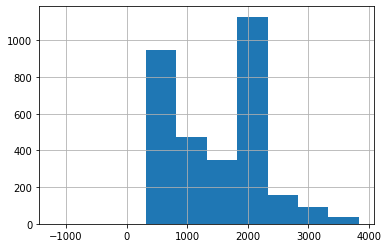

In [ ]:
q75 = np.percentile(df['tot_price'], 75)
q25 = np.percentile(df['tot_price'], 25)
iqr = q75 - q25
low_range = (q25 - 1.5 * iqr)
high_range = (q75 + 1.5 * iqr)
df['tot_price'].hist(range = (low_range, high_range))

Видим, что большинство людей вписываются в рамки своего тарифа, но в тарифе за 550р люди часто доплачивают за дополнительные пакеты.

***Для тарифа smart***

In [ ]:
df_smart = df.query('tariff == "smart"')

In [ ]:
df_smart.head()

,user_id,month,duration,duration_count,gb_used,messages,tariff,duration_over,gb_used_over,messages_over,duration_over_price,gb_used_over_price,messages_over_price,tot_price
8,1001,11,430.0,45.0,18.020,0.0,smart,0.0,3.020,0.0,0.0,603.906,0.0,1153.906
9,1001,12,414.0,47.0,13.724,0.0,smart,0.0,0.000,0.0,0.0,0.000,0.0,550.000
10,1002,6,117.0,14.0,10.616,4.0,smart,0.0,0.000,0.0,0.0,0.000,0.0,550.000
11,1002,7,214.0,21.0,17.188,11.0,smart,0.0,2.188,0.0,0.0,437.695,0.0,987.695
12,1002,8,289.0,37.0,19.870,13.0,smart,0.0,4.870,0.0,0.0,974.023,0.0,1524.023


Создал таблицу, в которой пользователи только тарифа smart

Для пакета минут:
Среднее: 417.9349484073576
Медиана: 422.0
Дисперсия: 36203.06665209469
Стандартное отклонение: 190.27103471651876


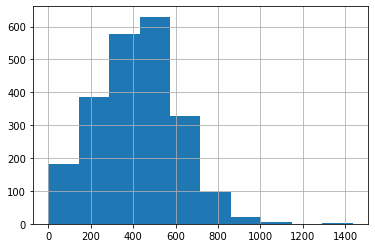

In [ ]:
print('Для пакета минут:')
print('Среднее:', df_smart['duration'].mean())
print('Медиана:', df_smart['duration'].median())
variance = np.var(df_smart['duration'])
print('Дисперсия:', variance)
standard_deviation = np.sqrt(variance)
print('Стандартное отклонение:', standard_deviation)
df_smart['duration'].hist()

Для пользователей тарифа smart характерно разговаривать по телефону в среднем ~400 минут в месяц.

Для пакета интернета:
Среднее: 15.84881682158479
Медиана: 16.1435546875
Дисперсия: 32.930767762221954
Стандартное отклонение: 5.7385335898835645


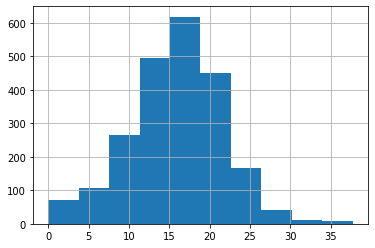

In [ ]:
print('Для пакета интернета:')
print('Среднее:', df_smart['gb_used'].mean())
print('Медиана:', df_smart['gb_used'].median())
variance = np.var(df_smart['gb_used'])
print('Дисперсия:', variance)
standard_deviation = np.sqrt(variance)
print('Стандартное отклонение:', standard_deviation)
df_smart['gb_used'].hist()

Для пользователей тарифа smart характерно использовать в среднем ~16 гигабайт в месяц.

Для пакета сообщений:
Среднее: 33.384028712427096
Медиана: 28.0
Дисперсия: 796.455482917076
Стандартное отклонение: 28.221542886898938


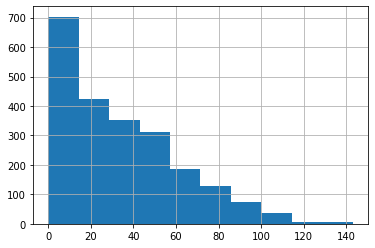

In [ ]:
print('Для пакета сообщений:')
print('Среднее:', df_smart['messages'].mean())
print('Медиана:', df_smart['messages'].median())
variance = np.var(df_smart['messages'])
print('Дисперсия:', variance)
standard_deviation = np.sqrt(variance)
print('Стандартное отклонение:', standard_deviation)
df_smart['messages'].hist()

Для пользователей тарифа smart характерно отправлять в среднем ~30 смс в месяц. При этом, многие использую очень мало смс из пакета.

***Для тарифа ultra***

In [ ]:
df_ultra = df.query('tariff == "ultra"')

Создал таблицу, в которой пользователи только тарифа ultra

Для пакета минут:
Среднее: 526.6233502538071
Медиана: 518.0
Дисперсия: 100771.2236172022
Стандартное отклонение: 317.44483554974113


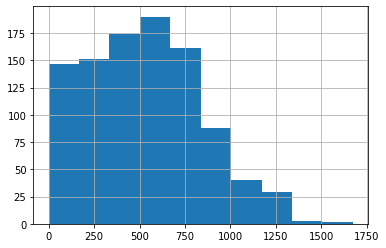

In [ ]:
print('Для пакета минут:')
print('Среднее:', df_ultra['duration'].mean())
print('Медиана:', df_ultra['duration'].median())
variance = np.var(df_ultra['duration'])
print('Дисперсия:', variance)
standard_deviation = np.sqrt(variance)
print('Стандартное отклонение:', standard_deviation)
df_ultra['duration'].hist()

Для пользователей тарифа ultra характерно разговаривать по телефону в среднем ~500 минут в месяц.

Для пакета интернета:
Среднее: 19.030177268401015
Медиана: 18.87109375
Дисперсия: 97.11468993002772
Стандартное отклонение: 9.854678580756843


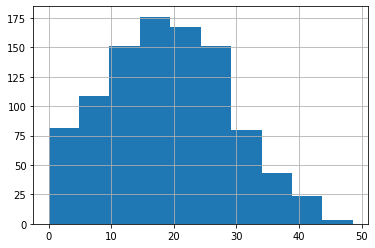

In [ ]:
print('Для пакета интернета:')
print('Среднее:', df_ultra['gb_used'].mean())
print('Медиана:', df_ultra['gb_used'].median())
variance = np.var(df_ultra['gb_used'])
print('Дисперсия:', variance)
standard_deviation = np.sqrt(variance)
print('Стандартное отклонение:', standard_deviation)
df_ultra['gb_used'].hist()

Для пользователей тарифа ultra характерно использовать в среднем ~19 гигабайт в месяц.

Для пакета сообщений:
Среднее: 49.36345177664975
Медиана: 38.0
Дисперсия: 2282.9460753948824
Стандартное отклонение: 47.78018496610161


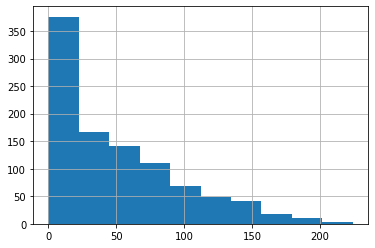

In [ ]:
print('Для пакета сообщений:')
print('Среднее:', df_ultra['messages'].mean())
print('Медиана:', df_ultra['messages'].median())
variance = np.var(df_ultra['messages'])
print('Дисперсия:', variance)
standard_deviation = np.sqrt(variance)
print('Стандартное отклонение:', standard_deviation)
df_ultra['messages'].hist()

Для пользователей тарифа ultra характерно отправлять в среднем ~40-50 смс в месяц. При этом, многие использую очень мало смс из пакета.

<div>
    
<b> Вывод по анализу обработанных данных</b>
    
В результате анализа обнаружилось, что большинству людей хватает услуг из своего пакета. Пользователи тарифа Смарт чаще покупают доп.пакеты.
    
Для пользователей тарифа Смарт характерно разговаривать по телефону в среднем ~400 минут в месяц. А дня пользователей тарифа Ультра это значение равно ~500 минут в месяц.
    
Для пользователей тарифа Смарт характерно использовать в среднем ~16 гигабайт в месяц. В то время как для пользователей тарифа Ультра характерно использовать в среднем ~19 гигабайт в месяц.
    
Для пользователей тарифа smart характерно отправлять в среднем ~30 смс в месяц. А для пользователей тарифа Ультра  ~40-50 смс в месяц. При этом, многие пользователи обоих тарифов использую очень мало смс из пакета. 
</div>

Проверка гипотез
========

### гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [ ]:
print('Средняя выручка от пользователей тарифа smart:', df_smart['tot_price'].mean())
print('Средняя выручка от пользователей тарифа ultra:', df_ultra['tot_price'].mean())

Средняя выручка от пользователей тарифа smart: 1233.3494665489009
Средняя выручка от пользователей тарифа ultra: 2060.5299710501267


Если проверить среднее значение конечной цены для каждого тарифа, то можно подумать, что средняя выручка отличается. Для точности проверю это методом st.ttest_ind()

In [ ]:
variance = np.var(df_smart['tot_price'])
print('Дисперсия_smart:', variance)
variance = np.var(df_ultra['tot_price'])
print('Дисперсия_ultra', variance)

Дисперсия_smart: 620174.2528422166
Дисперсия_ultra 126824.3988757163


Нулевая гипотеза: Выручка пользователей тарифов «Ультра» и «Смарт» одинакова

Альтернативная гипотеза: Выручка пользователей тарифов «Ультра» и «Смарт» различается 

In [ ]:
alpha = 0.05
results = st.ttest_ind(df_smart['tot_price'], df_ultra['tot_price'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу


Вывод к гипотезе 1:

Выручка компании от тарифов "Ультра" и "Смарт" различается.

### гипотиза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
df_city = pd.read_csv('/datasets/users.csv')
df_city = df_city.query('city == "Москва"')
df_city.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
33,1033,71,NaN,Москва,Лия,Бабушкина,2018-07-15,smart


СОздал таблицу, в которой указаны пользователи только из Москвы

In [ ]:
id_price_msk = df_city["user_id"]
df_price_msk = df.query('user_id in @id_price_msk')
df_price_not_msk = df.query('user_id not in @id_price_msk')

С помощью срезов создал 2 таблицы с данными о минутах, ГБ, смс и ценах: для жителей Москвы и для всех остальных городов.

In [ ]:
print('Средняя выручка от пользователей в Москве:', df_price_msk['tot_price'].mean())
print('Средняя выручка от пользователей не в Москве:', df_price_not_msk['tot_price'].mean())

Средняя выручка от пользователей в Москве: 1507.276761968085
Средняя выручка от пользователей не в Москве: 1482.0637267996062


Если взять среднее значение по столбцам с конечной ценой за услуги в конкретном месяце, то может показаться, что средныы выручка одинакова. Проверим это методом st.ttest_ind()

In [ ]:
variance = np.var(df_price_msk['tot_price'])
print('Дисперсия_пользователей в Москве:', variance)
variance = np.var(df_price_not_msk['tot_price'])
print('Дисперсия_пользователей не в Москве', variance)

Дисперсия_пользователей в Москве: 546347.0989109281
Дисперсия_пользователей не в Москве 630261.63263902


Нулевая гипотеза: Выручка пользователей из Москвы и пользователей из других регионов одинакова

Альтернативная гипотеза: Выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
alpha = 0.05
results = st.ttest_ind(df_price_msk['tot_price'], df_price_not_msk['tot_price'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


Вывод к гипотезе 2:

Выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Общий вывод
========

В рамках данного проекта выполнил анализ данных о пользователях двух тарифов.
Для этого объединил исходные таблицы в одну основную таблицу. Посчитал количество минут, ГБ и смс, которые каждый пользователь потратил сверх твоего пакета, и сколько придется заплатить за них. Посчитал, сколько пользователь заплатил в месяц, с учетом перерасхода пакета услуг.
    
При подготовке данных заметил, что в некоторых ячейках отсутствуют значения (т.е. значение ячейки равно "NaN"). Для того, чтобы можно было производить необходимые операции с данными ячейками, заменил их на ноль.
    
Также заметил, что в исходной таблице с количеством использованных мегабайт есть нулевые значения. Получается, что пользователь начал новую интернет-сессию, но мегабайты при этом не расходуются. Возможно это связано с тем, что пользователь тратит несколько килобайт, что свляется ниже порогового значения, от которого начинается запись в таблицу. 

Затем, в результате анализа обработанных данных обнаружил, что большинству людей хватает услуг из своего пакета. При этом пользователи тарифа Смарт чаще покупают доп.пакеты.
    
Для пользователей тарифа Смарт характерно разговаривать по телефону в среднем ~400 минут в месяц. А дня пользователей тарифа Ультра это значение равно ~500 минут в месяц.
    
Для пользователей тарифа Смарт характерно использовать в среднем ~16 гигабайт в месяц. В то время как для пользователей тарифа Ультра характерно использовать в среднем ~19 гигабайт в месяц.
    
Для пользователей тарифа smart характерно отправлять в среднем ~30 смс в месяц. А для пользователей тарифа Ультра  ~40-50 смс в месяц. При этом, многие пользователи обоих тарифов использую очень мало смс из пакета. 

Поскольку удалось доказать гипотезу "Выручка пользователей тарифов «Ультра» и «Смарт» различается" то ,исходя из средней выручки компании от двух тарифов, можно сказать, что тариф Ультра более выгоден компании. Средняя выручка компании от пользователей тарифа Смарт равняется 1233 рубля в месяц, тогда как для тарифа Ультра средняя выручка равна 2060 рублей в месяц.

-